# Exploratory Data Analysis

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('seaborn')
sns.set_theme()

In [20]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('train shape:', train.shape)
print('test shape:', test.shape)

train.head()

train shape: (140700, 20)
test shape: (93800, 19)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [21]:
# Basic information and missing values
display(train.info())

missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train[missing_train > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

None

Study Satisfaction    112803
Academic Pressure     112803
CGPA                  112802
Profession             36630
Work Pressure          27918
Job Satisfaction       27910
Dietary Habits             4
Financial Stress           4
Degree                     2
dtype: int64

In [22]:
# Feature engineering: drop columns not useful for modeling (Name) and separate target
train_proc = train.copy()
test_proc = test.copy()

# drop Name column if present
for df in [train_proc, test_proc]:
    if 'Name' in df.columns:
        df.drop(columns=['Name'], inplace=True)

# separate target
if 'Depression' in train_proc.columns:
    y = train_proc['Depression']
    X = train_proc.drop(columns=['Depression'])
else:
    y = None
    X = train_proc

# Identify categorical and numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Some columns encoded as numeric but are categorical (e.g., academic pressure may be numeric scale). Keep these as numeric for now.
print('numerical_cols:', numerical_cols)
print('categorical_cols:', categorical_cols)

numerical_cols: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
categorical_cols: ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


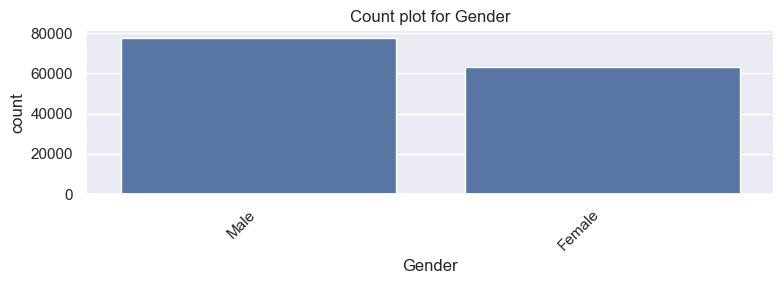

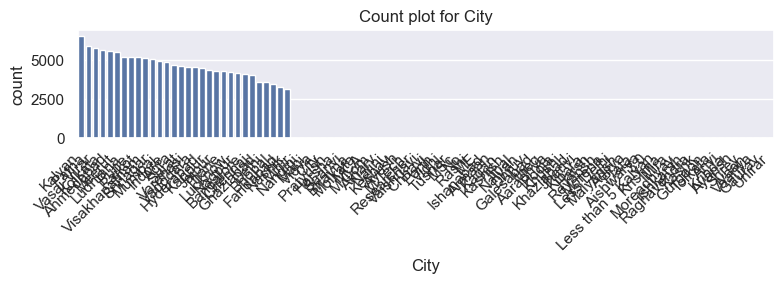

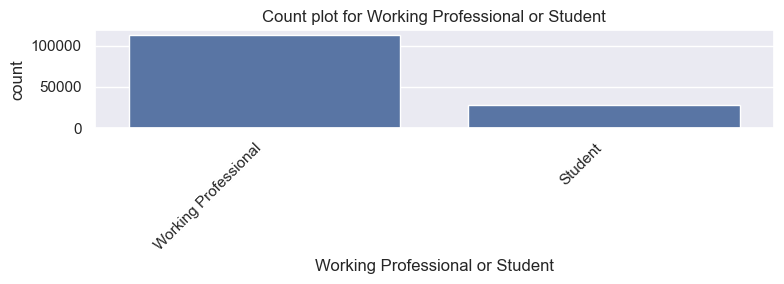

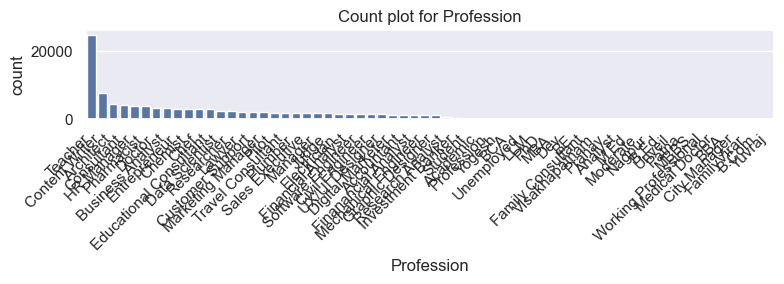

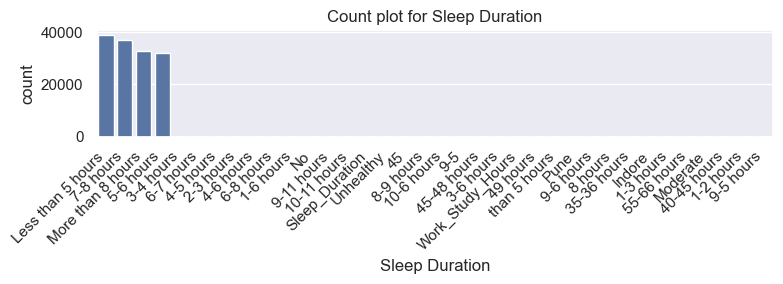

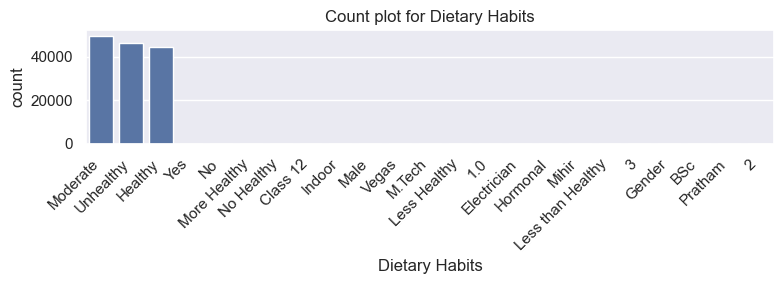

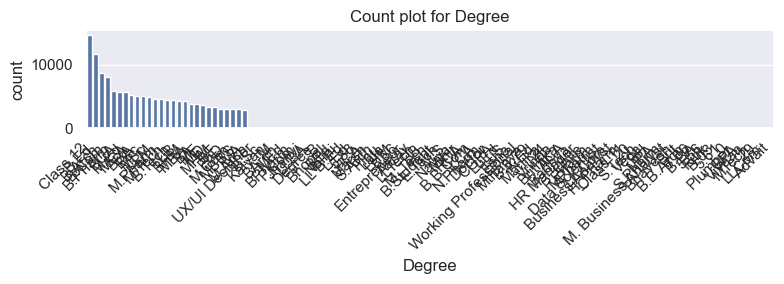

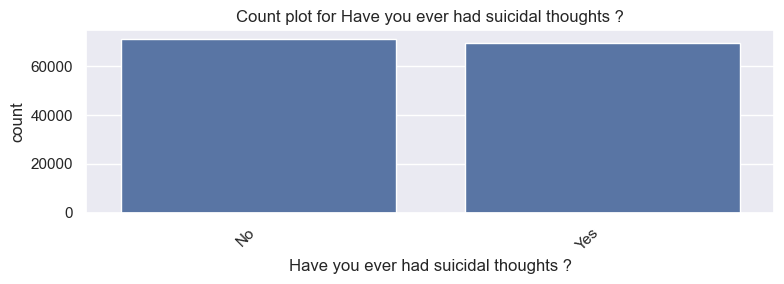

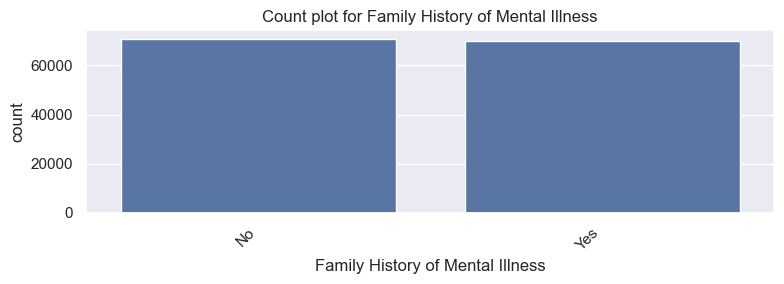

In [23]:
# Visualize categorical features with countplots
cols = categorical_cols
n = len(cols)
if n == 0:
    print('No categorical columns detected.')
else:
    for c in cols:
        plt.figure(figsize=(8,3))
        order = X[c].value_counts().index
        sns.countplot(data=X, x=c, order=order)
        plt.title(f'Count plot for {c}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

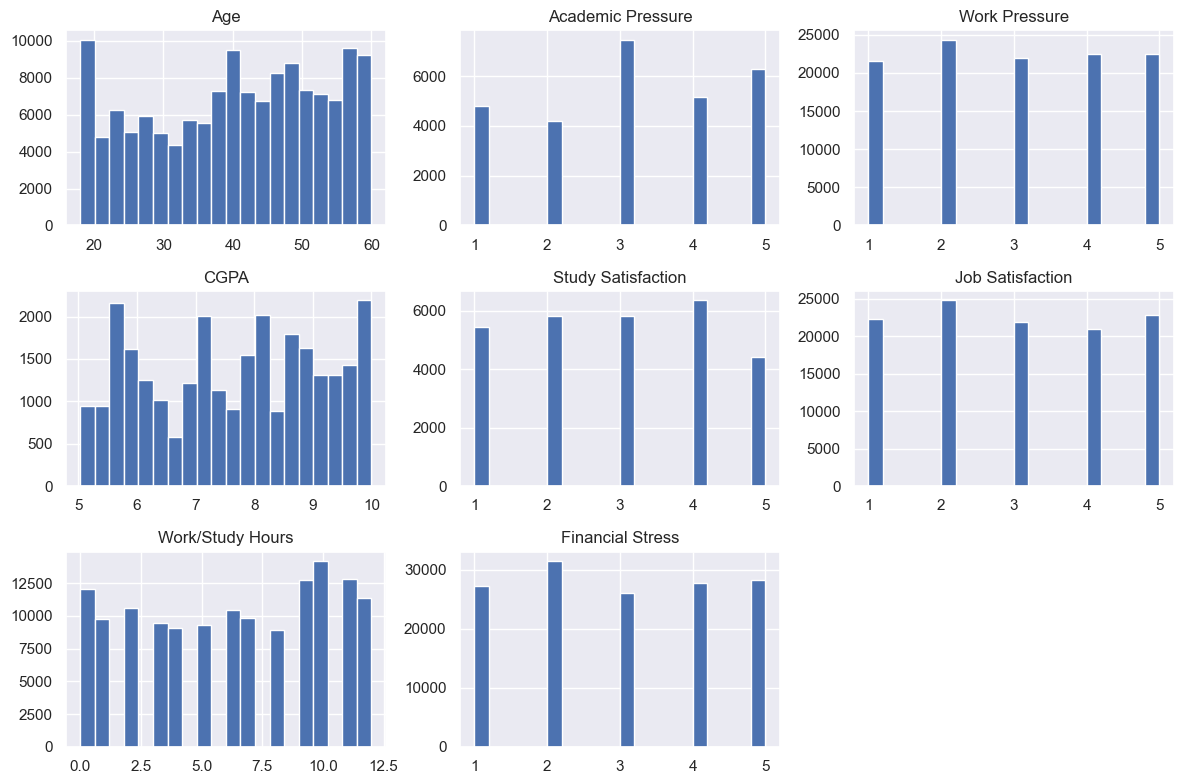

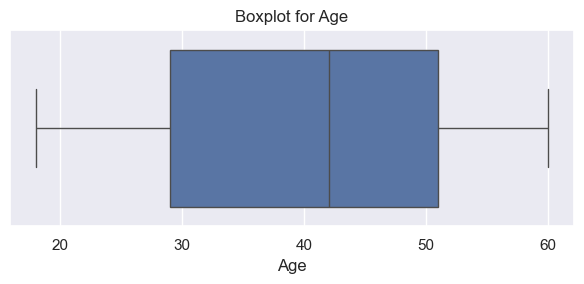

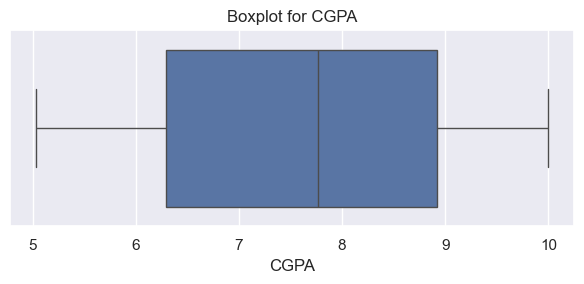

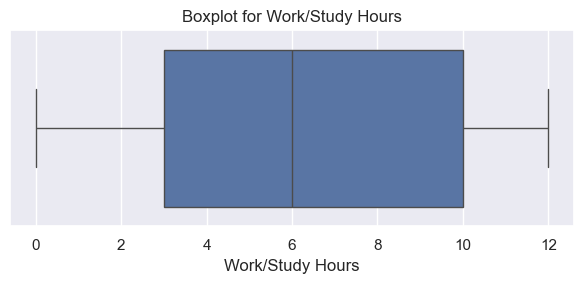

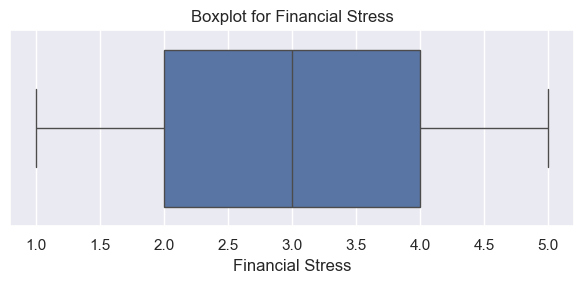

In [24]:
# Visualize numerical features with histograms and boxplots
num_cols = numerical_cols
if len(num_cols) == 0:
    print('No numerical columns detected')
else:
    display_cols = [c for c in num_cols if c != 'id'][:12]  # limit to first 12 numeric features
    X[display_cols].hist(bins=20, figsize=(12, 8))
    plt.tight_layout()
    plt.show()
    
    # boxplots for a few important numeric columns if present
    for c in ['Age','CGPA','Work/Study Hours','Financial Stress']:
        if c in X.columns:
            plt.figure(figsize=(6,3))
            sns.boxplot(x=X[c])
            plt.title(f'Boxplot for {c}')
            plt.tight_layout()
            plt.show()

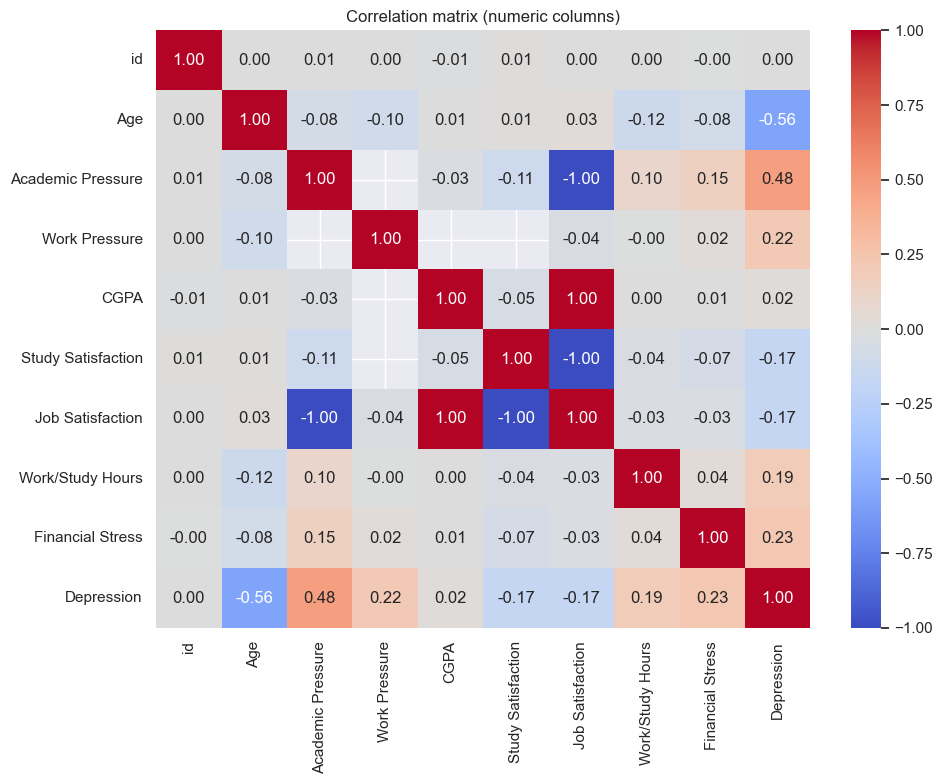

In [25]:
# Correlation heatmap for numeric features (including target if available)
corr_df = train_proc.select_dtypes(include=[np.number]).copy()
if 'Depression' in corr_df.columns:
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation matrix (numeric columns)')
    plt.tight_layout()
    plt.show()
else:
    print('No numeric target found; showing correlations among numeric features')
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.tight_layout()
    plt.show()

In [26]:
# Create final feature lists and show sample of processed X/y
feature_info = {
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols
}
feature_info

# show processed X sample
X.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
